In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gene_panel_selection import ExpressionDataset, ScranMethod, GeneBasisMethod, GenePanelSelection

In [2]:
directory = '//allen/programs/celltypes/workgroups/synphys/NHP_spatial/'

In [3]:
# load data

annotations = pd.read_feather(directory + 'anno.feather').set_index('sample_id')
genes = pd.read_feather(directory + 'genes.feather')
expression = pd.read_feather(directory + 'expression_matrix_cpm_normalized.feather')
expression = expression.set_index(genes['gene'])
annotations.head()

exp_data = ExpressionDataset(
    expression_data=expression,  # dataframe, one gene per row, index is gene names, columns are samples
    annotation_data=annotations,  # dataframe, index is sample names, has columns 'cluster', 'subclass', 'class'
    save_path = directory + 'gene_panel_runs' # path to save to for later recall
)

In [4]:
# transform to log counts
exp_data.logcounts()

In [6]:
# pre-select highly variable genes
hvg_selection = ScranMethod(exp_data=exp_data).select_gene_panel(size=None, args={})

In [7]:
hvg_selection.report()

{'n_genes_selected': 17527, 'variance_threshold': 0, 'used_log_counts': True, 'file_name': 'hvg_selection'}


In [8]:
hvg_exp_data = hvg_selection.expression_dataset()

In [9]:
# geneBasis gene selection
# first convert to SCE format

gene_basis = GeneBasisMethod(exp_data=hvg_exp_data)

gene_basis.df_to_sce()

saving expression and annotation data to csv...
converting data to SCE format...
Counts matrix is being processed.
Meta file is being processed.


In [10]:
# select genes

final_selection = gene_basis.select_gene_panel(size=140)

Constructing the True graph.
True graph is constructed.
First gene is added: ADARB2. 139 left.
New gene is added: NXPH1. 138 left.
New gene is added: ZMAT4. 137 left.
New gene is added: LUZP2. 136 left.
New gene is added: LOC106995651. 135 left.
New gene is added: KCNMB2. 134 left.
New gene is added: ATP1A2. 133 left.
New gene is added: CDH12. 132 left.
New gene is added: KCNQ5. 131 left.
New gene is added: RGS6. 130 left.
New gene is added: PTPRT. 129 left.
New gene is added: LOC716834. 128 left.
New gene is added: ALCAM. 127 left.
New gene is added: LOC114673457. 126 left.
New gene is added: NKAIN2. 125 left.
New gene is added: NPAS3. 124 left.
New gene is added: FSTL5. 123 left.
New gene is added: PRKG1. 122 left.
New gene is added: PDE4B. 121 left.
New gene is added: CLDN5. 120 left.
New gene is added: NPY. 119 left.
New gene is added: LOC114676827. 118 left.
New gene is added: GRM8. 117 left.
New gene is added: DGKG. 116 left.
New gene is added: GRIA4. 115 left.
New gene is added:

In [11]:
final_selection.report()

{'n_genes_selected': 140, 'used_log_counts': True, 'file_name': 'gene_panel_selection'}


In [18]:
neighborhood_score = gene_basis.neighborhood_score(final_selection)

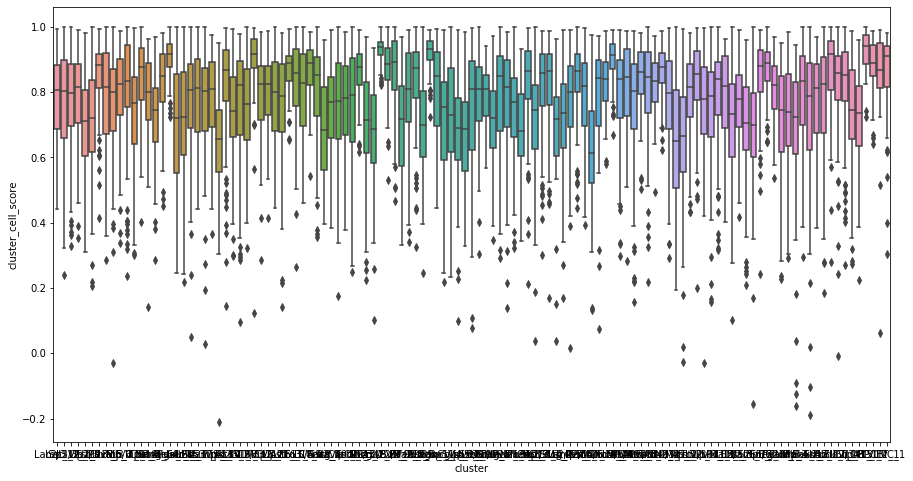

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=neigh_df, x='cluster', y='cluster_cell_score', ax=ax)

In [73]:
neigh_df.describe()['cluster_cell_score']

count    10772.000000
mean         0.772220
std          0.163127
min         -0.210955
25%          0.682752
50%          0.809525
75%          0.896379
max          1.000000
Name: cluster_cell_score, dtype: float64